In [57]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Read file
df = pd.read_csv("Amazon Customer Behavior Survey.csv")


In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [59]:
# Copy file
df_copy = df.copy(deep=True)

1.Copy the file to ensure that the original data remains unmodified.
2.The timestamp column in the original data is stored in a datetime format. When copying the data, use deep=True to preserve its type. If the column is mistakenly recognized as an object type during copying, subsequent format conversions will be more complex.

In [60]:
# Data Observation
print("\nDataset Overview:")
print("Shape:", df_copy.shape)
print("\nColumn Info:")
print(df_copy.info())


Dataset Overview:
Shape: (602, 23)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing    

1. The dataset has 602 rows and 23 columns;
2. Product_Search_Method has 2 missing values. This column has 600 non-null values, but the dataset has 602 rows.
3. Personalized_Recommendation_Frequency appears twice, so there is a duplicate column.

In [82]:
df_copy.loc[:, "Product_Search_Method"] = df_copy["Product_Search_Method"].fillna("Unknown")

Because the data set is not very large, I did not delete it directly, but kept these two rows of data.

In [79]:
print(df_copy.isnull().sum())

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas                         0
dtype: int64


In [63]:
df_copy[["Personalized_Recommendation_Frequency", "Personalized_Recommendation_Frequency "]].head()

,Personalized_Recommendation_Frequency,Personalized_Recommendation_Frequency
0,Yes,2
1,Yes,2
2,No,4
3,Sometimes,3
4,Yes,4


There are two columns with the same name but different values. So I asked the owner of the dataset on Kaggle. According to the original questionnaire she showed, I knew that the author wanted to show more detailed and data-based frequencies. The column with the data type of Object may be a problem when the author merged tables or exported data, so delete the column with the data type of Object.

In [64]:
# Delete the Personalized_Recommendation_Frequency column that type is object
df_copy = df_copy.drop(columns=df_copy.select_dtypes(include="object").columns.intersection(["Personalized_Recommendation_Frequency"]))


In [80]:
# Check whether the deletion is work
df_copy.filter(like="Personalized_Recommendation_Frequency").head()

,Personalized_Recommendation_Frequency
0,2
1,2
2,4
3,3
4,4


The processing of missing values and duplicate values has been completed. Next, check more detailed data information

In [83]:
# Get information about data type variables
print(df_copy.describe())

# Get statistics about categorical variables
print(df_copy.describe(include='object'))

              age  Customer_Reviews_Importance  \
count  578.000000                   578.000000   
mean    29.967128                     2.467128   
std      8.875841                     1.192027   
min     12.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     35.000000                     3.000000   
max     55.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              578.000000         578.00000   
mean                                 2.686851           2.66263   
std                                  1.045184           0.90752   
min                                  1.000000           1.00000   
25%                                  2.000000           2.00000   
50%                                  3.000000           3.00000   
75%                                  3.000000           3.00000   
max          

According to the running results,  1.Gender has four unique values, which is a bit strange.   2.The minimum age is 3 years old and the maximum age is 240 years old, which is an obvious abnormality. Because the use of Amazon's official website is limited to people over 18 years old, and the normal age of people rarely exceeds 200 years old.  3. Max = 99, far beyond the reasonable range (usually 1-5 ratings) is also an obvious abnormal value.

In [67]:
# Check details of Gender
print(df_copy['Gender'].value_counts(dropna=False))

Gender
Female               352
Male                 142
Prefer not to say     89
Others                19
Name: count, dtype: int64


Reasonable

In [68]:
# Check and handle the outlier of age column
# Calculate IQR interquartile range
Q1 = df_copy['age'].quantile(0.25)
Q3 = df_copy['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate tighter outlier ranges
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter out outliers on age colunm
df_copy = df_copy[(df_copy['age'] >= lower_bound) & (df_copy['age'] <= upper_bound)]

# Filter Shopping_Satisfaction outliers (keep only 1-5)
df_copy = df_copy[df_copy['Shopping_Satisfaction'].between(1, 5)]

1. Identified outliers in the age column using the IQR method. Then move the outliers.
2.The shopping_satisfaction column does not calculate outliers because, according to the fact, the rating range is between 1--5, so the values outside the range can be directly removed.

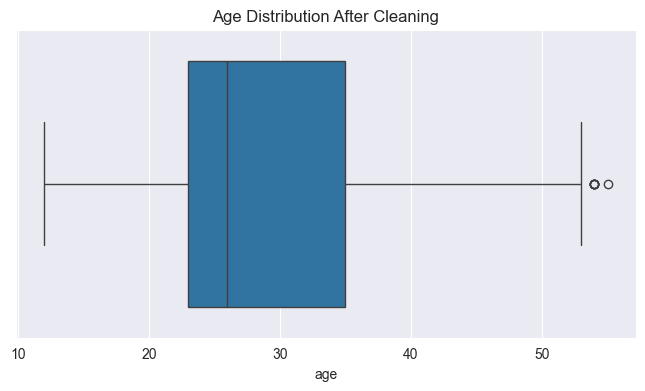

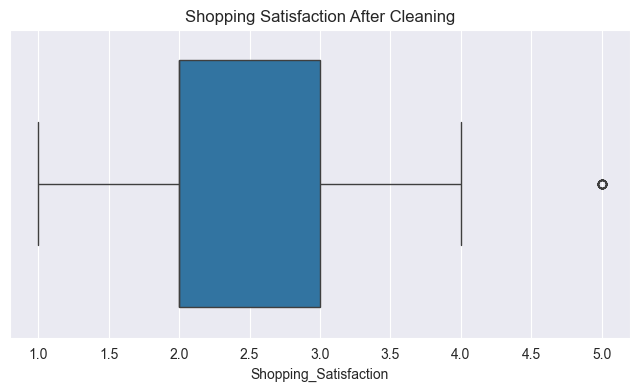

In [69]:
# Draw the box plot of age and shopping satisfaction for check the result of clean
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_copy['age'])
plt.title("Age Distribution After Cleaning")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_copy['Shopping_Satisfaction'])
plt.title("Shopping Satisfaction After Cleaning")
plt.show()


Take a closer look at the distribution of these two valuesThere are outliers in satisfaction, which may be because the scores are relatively concentrated. There are multiple outliers in the age column. Take a closer look at the distribution of these two values

count    578.000000
mean      29.967128
std        8.875841
min       12.000000
25%       23.000000
50%       26.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64


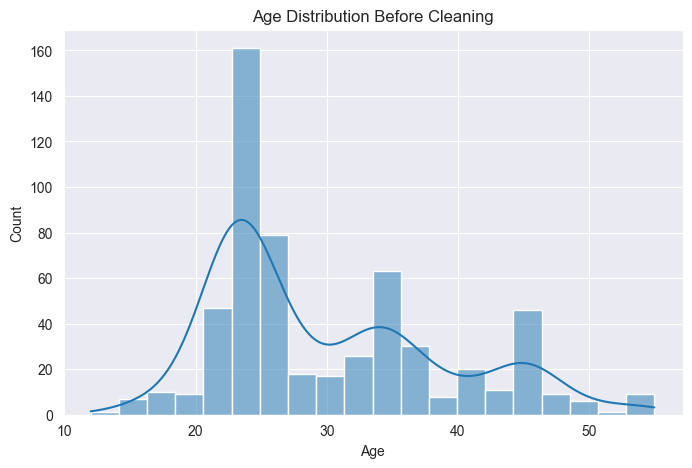

In [70]:
# Check the statistics of age
print(df_copy['age'].describe())

# Draw the histogram of age
plt.figure(figsize=(8, 5))
sns.histplot(df_copy['age'], bins=20, kde=True)
plt.title("Age Distribution Before Cleaning")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The IQR method (1.5 * IQR) is usually suitable for data that is close to a normal distribution, but the age distribution is skewed , it was not be able to completely remove high-age outliers. I don't think further cleaning is needed. Because data of elderly users is also valuable for research.

<Axes: xlabel='Shopping_Satisfaction', ylabel='Count'>

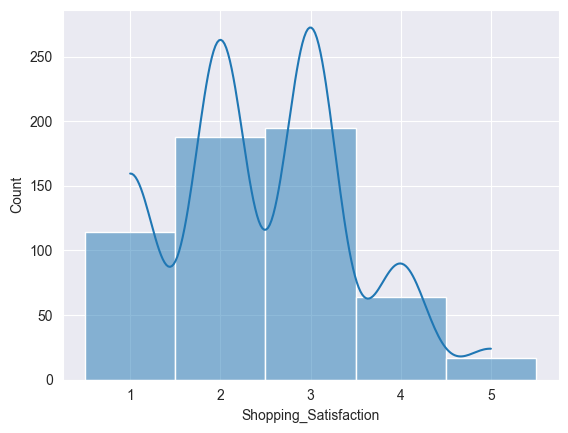

In [71]:
# Draw the histogram of satisfaction
sns.histplot(df_copy['Shopping_Satisfaction'], discrete=True, kde=True)

1.There are more low ratings (1, 2) and fewer high ratings (4, 5), which may mean that the overall shopping experience evaluation is biased towards medium or poor.  2.The rating distribution does not have an obvious normal distribution (bell-shaped curve), but has multiple peaks. I think that Shopping_Satisfaction itself is discrete data (1-5), so even if some values appear more or less, it does not mean that they are outliers.

In [72]:
# View the data description after cleaning
print(df_copy.describe())
print(df_copy.describe(include='object'))

              age  Customer_Reviews_Importance  \
count  578.000000                   578.000000   
mean    29.967128                     2.467128   
std      8.875841                     1.192027   
min     12.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     35.000000                     3.000000   
max     55.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              578.000000         578.00000   
mean                                 2.686851           2.66263   
std                                  1.045184           0.90752   
min                                  1.000000           1.00000   
25%                                  2.000000           2.00000   
50%                                  3.000000           3.00000   
75%                                  3.000000           3.00000   
max          

The data is normal, can start visualization.

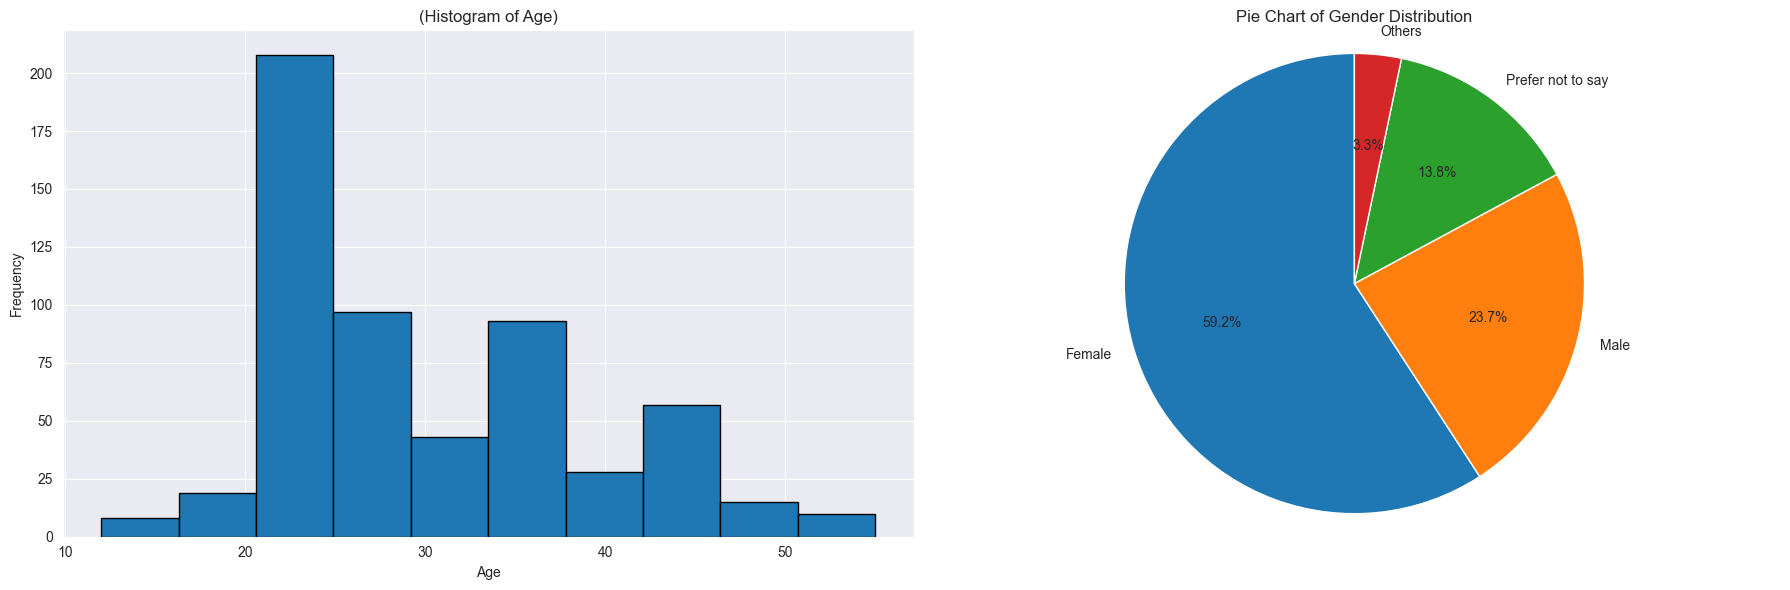

In [73]:
# Topic: How to optimize the user experience of e-commerce platforms?
# 1.User Profile
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# 1) Histogram of Age
axs[0].hist(df_copy['age'].dropna(), bins=10, edgecolor='black')
axs[0].set_title("(Histogram of Age)")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Frequency")

# 2) Pie Chart of Gender Distribution
gender_counts = df_copy['Gender'].value_counts()
axs[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Pie Chart of Gender Distribution")
axs[1].axis('equal')
plt.tight_layout()
plt.show()

1. The highest peak appears around 25 years old, indicating that users in this age group account for the largest proportion.
Another obvious peak is around 35 years old, which may indicate that the core user groups of the platform include 25 and 35 years old. 2. Female users account for the largest proportion (about 60%):
This shows that the main user group of the platform is female.

In [74]:
df_copy["Gender"] = df_copy["Gender"].replace({"Prefer not to say": "Non-binary/Unspecified", "Others": "Non-binary/Unspecified"})

1.Gender also has "prefer not to say" and "others". In order to make the visualization more concise later, these two are grouped into one category.

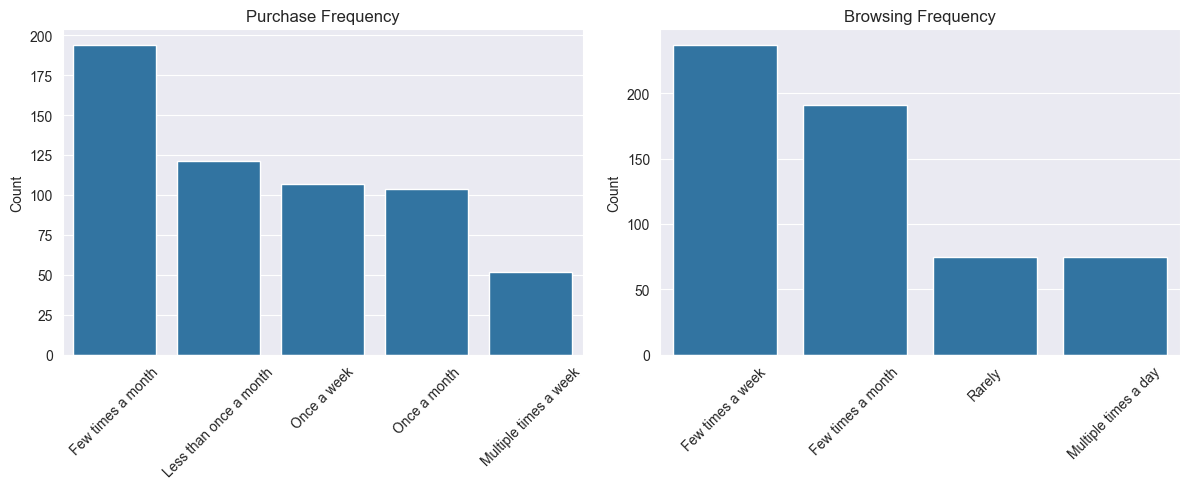

In [84]:
# 2. User behavior portrait
# Draw the bar chart of Purchase Frequency and Browsing Frequecy
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Purchase_Frequency", data=df_copy, order=df_copy["Purchase_Frequency"].value_counts().index, ax=axes[0])
axes[0].set_title("Purchase Frequency")
axes[0].set_xlabel("")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x="Browsing_Frequency", data=df_copy, order=df_copy["Browsing_Frequency"].value_counts().index, ax=axes[1])
axes[1].set_title("Browsing Frequency")
axes[1].set_xlabel("")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Most users purchase several times a month, and most users browse more frequently than they purchase. This means that many users just browse but do not necessarily purchase.

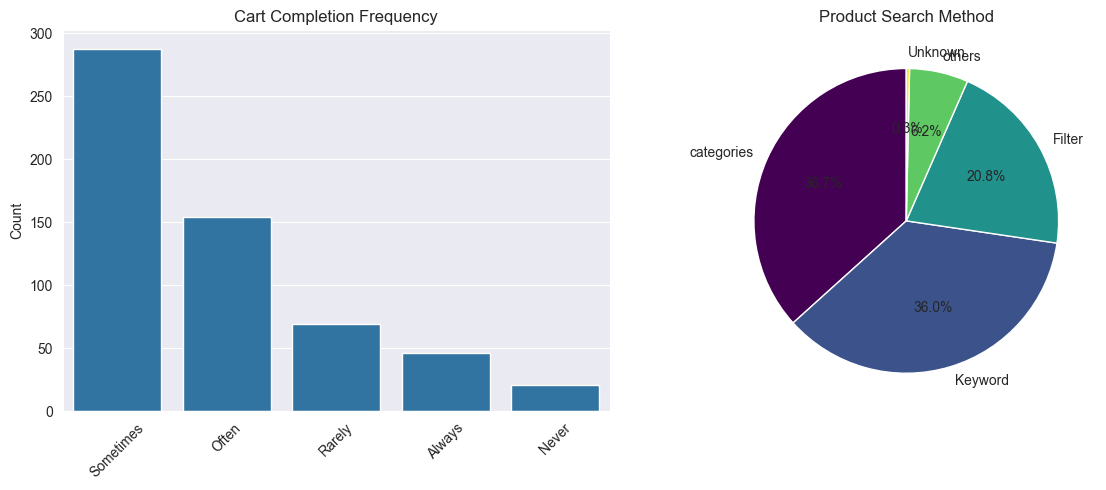

In [85]:
# Draw the bar chart of Cart Completion Frequency ande pie chart of Product Search Method
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Cart_Completion_Frequency", data=df_copy, order=df_copy["Cart_Completion_Frequency"].value_counts().index, ax=axes[0])
axes[0].set_title("Cart Completion Frequency")
axes[0].set_xlabel("")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

df_copy["Product_Search_Method"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=axes[1], colormap="viridis")
axes[1].set_title("Product Search Method")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

1. Many users have the intention to buy but do not place an order in the end; 2. Users mainly search for products through "keyword search" and "category screening", which shows that users have strong purpose and the platform's algorithms and recommendations may not be attractive enough.

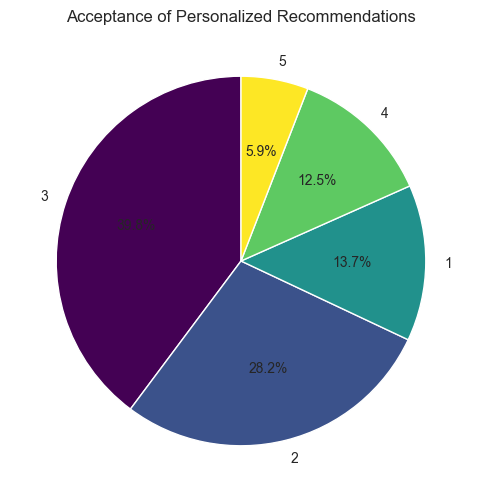

In [91]:
# analyze on Personalized recommendations
df_copy.columns = df_copy.columns.str.strip()
recommendation_counts = df_copy["Personalized_Recommendation_Frequency"].value_counts()

plt.figure(figsize=(8, 6))
recommendation_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap="viridis")

plt.title("Acceptance of Personalized Recommendations")
plt.ylabel("")
plt.show()


The acceptance of personalized recommendations is average, with scores ranging from 2 to 3 points, and only 5.9% of users give 5 points. Combined with the data of user search methods, it can be seen that the recommendation mechanism and algorithm still need to be further optimized to improve accuracy.

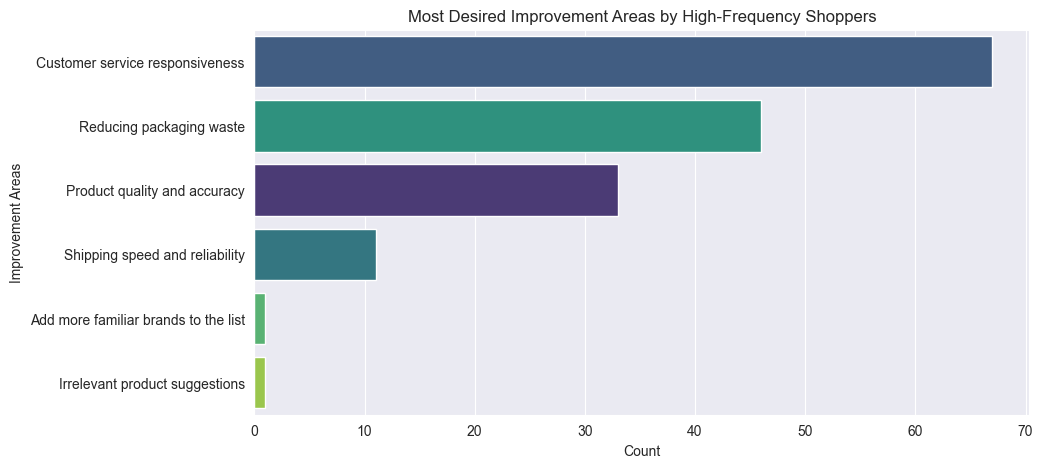

In [88]:
# Draw the bar chart
plt.figure(figsize=(10, 5))
sns.countplot(y="Improvement_Areas", data=high_freq_shoppers, order=improvement_order, palette="viridis", hue="Improvement_Areas")
plt.xlabel("Count")
plt.ylabel("Improvement Areas")
plt.title("Most Desired Improvement Areas by High-Frequency Shoppers")
plt.show()


The improvement area that customers are most concerned about is: Customer service responsiveness This is the improvement demand reported by most users, indicating that many users may have encountered problems such as slow customer service response and untimely problem handling.
The second biggest concern is reducing packaging waste. Then this is product quality and accuracy. It means that the platform may have product quality problems or inaccurate descriptions on the product details page.
Logistics-related issues and brand and recommendation systems have lower demands.

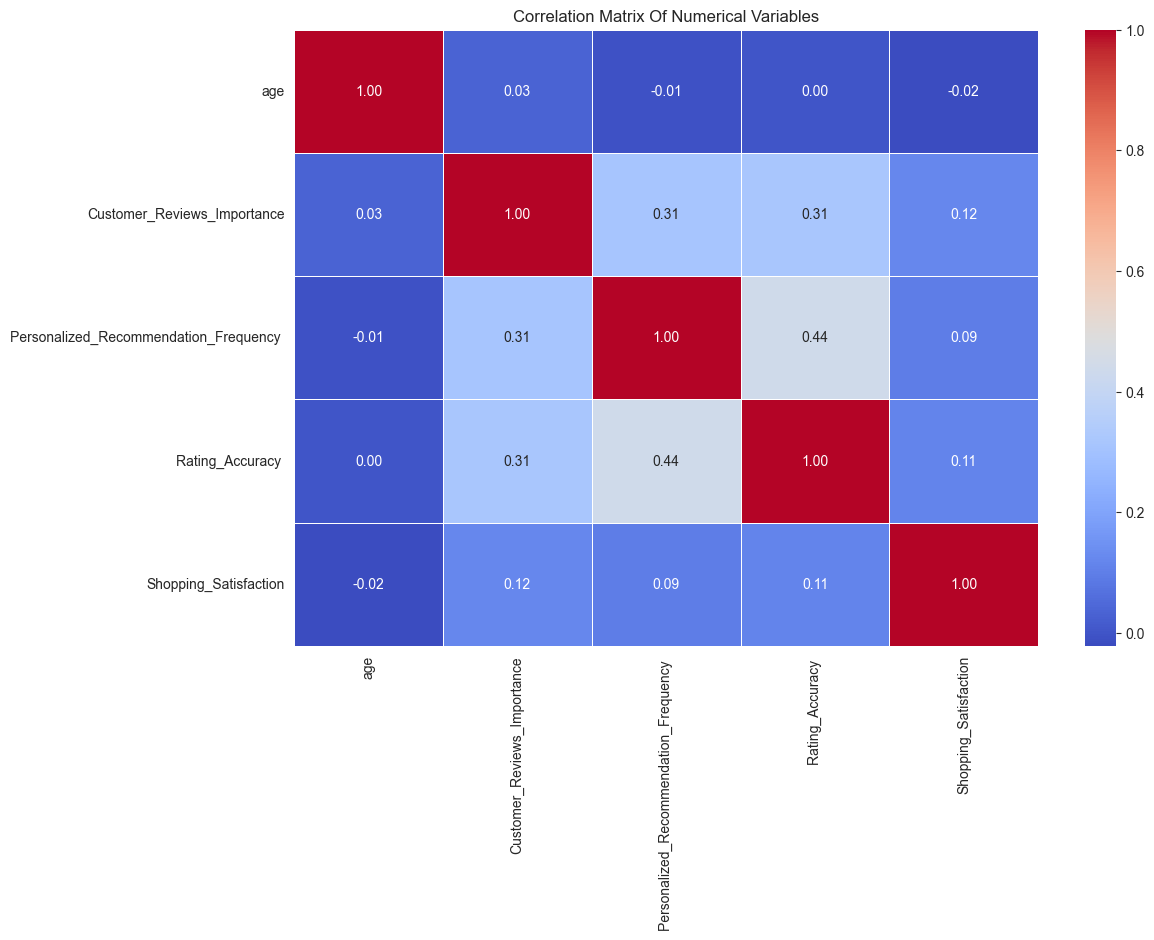

In [117]:
# Select numeric variables
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Draw a heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Of Numerical Variables")

plt.show()


From the heat map, there is not much correlation between the variables in this data set. The correlation coefficient between personalized recommendation and rating accuracy is 0.44, which is the highest value. However, this value does not mean that there is a strong relationship between the two variables, but only that they may be slightly related.
The correlation between shopping satisfaction and other variables is extremely low (<0.2), which means that factors that affect shopping satisfaction may be not included in the data set, such as price, product quality, logistics, etc.

Summary: According to the chart, we can know that the core user profile of the platform is women aged 20-30, and the design and marketing of the platform can focus on this group. In terms of user behavior analysis,
it can be seen that the platform conversion rate is not high enough (high browsing frequency, low shopping cart rate and purchase frequency). Perhaps better product recommendations, personalized promotions and simplified checkout process strategies are needed. Further analysis of search methods and acceptance of personalized recommendations also confirmed this point.
When analyzing the areas that need improvement, it was found that customer service response, product description and quality mismatch are the issues that users are most concerned about. On the one hand, the platform needs to invest in customer service research and development, and on the other hand, it needs to control product quality.
When analyzing the charts, some analyses cannot be continued due to lack of data. For example, the final heat map shows that there is almost no correlation between the variables, which may be because the variables in the data set are not covered widely enough. In the study of user behavior and conversion rate, you can see the frequency of users browsing, adding to the shopping cart, and purchasing, but you cannot see the complete process, and the churn rate and reasons for churn in each link, which is a pity. Further research can collect information about users’ income levels and purchase amounts to improve user portraits; collect information about the number of people who purchase at each stage of the purchase process and the reasons for abandonment to improve overall conversion rates.